In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import matplotlib
from mantid.simpleapi import *
import matplotlib.patheffects as PathEffects
import matplotlib.patheffects as PathEffects
cwd=os.getcwd()
sys.path.append("../python scripts/")


from nxspetomd import *
from genslices import *
import MDUtils as mdu
from getcolor import *
from cut_mdhisto_powder import *
#Style sheet updates 
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.top']=True
plt.rcParams['ytick.right']=True
plt.rcParams['font.size']=10
plt.rcParams['xtick.labelsize']=10
plt.rcParams['ytick.labelsize']=10
plt.rcParams['text.usetex']=False
plt.rcParams['font.family']='serif'
%matplotlib inline

FrameworkManager-[Notice] Welcome to Mantid 6.7.0
FrameworkManager-[Notice] Please cite: http://dx.doi.org/10.1016/j.nima.2014.07.029 and this release: http://dx.doi.org/10.5286/Software/Mantid6.7
CheckMantidVersion-[Notice] A new version of Mantid(6.8.0) is available for download from https://download.mantidproject.org
DownloadInstrument-[Notice] All instrument definitions up to date


## First make a plot showing the flipping ratio using the $\sigma_z$ scattering

LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, will use default of 0.0 instead.
LoadNXSPE-[Notice] LoadNXSPE successful, Duration 0.12 seconds
ConvertToMD-[Notice] ConvertToMD started
ConvertToMD-[Notice] ConvertToMD successful, Duration 0.16 seconds
BinMD-[Notice] BinMD started
BinMD-[Notice] BinMD successful, Duration 0.01 seconds
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.01 seconds
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace started
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace successful, Duration 0.00 seconds
MultiplyMD-[Notice] MultiplyMD started
MultiplyMD-[Notice] MultiplyMD successful, Duration 0.00 seconds
LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, will use default of 0.0 instead.
LoadNXSPE-[Notice] LoadNXSPE successful, Duration 0.10 seconds
ConvertToMD-[Notice] Conve

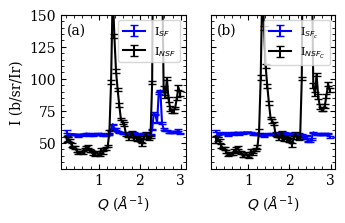

In [2]:
f_pz_sf_noflip = cwd+'/slice_data/HLIO_Pz_SF_noflip.nxspe'
f_pz_sf= cwd+'/slice_data/HLIO_Pz_SF.nxspe'

f_pz_nsf_noflip = cwd+'/slice_data/HLIO_Pz_NSF_noflip.nxspe'
f_pz_nsf= cwd+'/slice_data/HLIO_Pz_NSF.nxspe'

Q20 = GenQslice(0,4,120)
E20= GenEslice(-20,20,80)
norm=1.0e5

md_sfz_noflip = NxspeToMDHisto(f_pz_sf_noflip,Q20,E20,van_factor=norm)
md_nsfz_noflip = NxspeToMDHisto(f_pz_nsf_noflip,Q20,E20,van_factor=norm)
md_sfz = NxspeToMDHisto(f_pz_sf,Q20,E20,van_factor=norm)
md_nsfz = NxspeToMDHisto(f_pz_nsf,Q20,E20,van_factor=norm)



fig,ax = plt.subplots(1,2,figsize=(3.54,2),sharex=True,sharey=True)

qbins = [0,3,0.04]
ebins = [-1,1]
q_sf_noflip,i_sf_noflip,err_sf_noflip = cut_MDHisto_powder(md_sfz_noflip,'|Q|',qbins,ebins)
ax[0].errorbar(q_sf_noflip,i_sf_noflip,err_sf_noflip,color='b',marker=' ',mfc='w',mec='b',ls='-',capsize=3,\
              label='I$_{SF}$')

q_sf,i_sf,err_sf = cut_MDHisto_powder(md_sfz,'|Q|',qbins,ebins)
ax[1].errorbar(q_sf,i_sf,err_sf,color='b',marker=' ',mfc='w',mec='b',ls='-',capsize=3,label='I$_{SF_c}$')

q_nsf_noflip,i_nsf_noflip,err_nsf_noflip = cut_MDHisto_powder(md_nsfz_noflip,'|Q|',qbins,ebins)
ax[0].errorbar(q_nsf_noflip,i_nsf_noflip,err_nsf_noflip,color='k',marker=' ',mfc='k',mec='b',ls='-',capsize=3,\
              label='I$_{NSF}$')

q_nsf,i_nsf,err_nsf = cut_MDHisto_powder(md_nsfz,'|Q|',qbins,ebins)
ax[1].errorbar(q_nsf,i_nsf,err_nsf,color='k',marker=' ',mfc='k',mec='b',ls='-',capsize=3,\
              label='I$_{NSF_C}$')
ax[0].set_ylim(30,150)
ax[0].legend(fontsize=8,loc=1)
ax[1].legend(fontsize=8,loc=1)
ax[0].text(0.05,0.95,'(a)',transform=ax[0].transAxes,horizontalalignment='left',verticalalignment='top')
ax[1].text(0.05,0.95,'(b)',transform=ax[1].transAxes,horizontalalignment='left',verticalalignment='top')

ax[0].set_xlabel("$Q$ ($\AA^{-1}$)")
ax[1].set_xlabel("$Q$ ($\AA^{-1}$)")
ax[0].set_ylabel('I (b/sr/Ir)')


fig.savefig('Flip_ratio_fig.pdf',bbox_inches='tight')


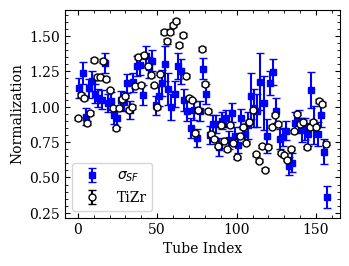

In [20]:
#Now make a figure showing the detector normlization using the SF vs TiZr
fig,ax=plt.subplots(1,1,figsize=(3.54,2.7))

dat_SF = []
#For some reason mantid saved this with a line break between the detector indices
with open('cut_data/norm_SF_tube.csv') as f:
    lines = f.readlines()
    #Skip first line
    lines = lines[1:]
    for i in range(int(len(lines)/2)):
        det_ind = int(lines[i*2])
        det_x_i_err = lines[i*2+1].replace('\n','').split(',')
        I = float(det_x_i_err[1])
        Err = float(det_x_i_err[2])
        dat_SF.append([det_ind,I,Err])
dat_TiZr = []
#For some reason mantid saved this with a line break between the detector indices
with open('cut_data/norm_TiZr_tube.csv') as f:
    lines = f.readlines()
    #Skip first line
    lines = lines[1:]
    for i in range(int(len(lines)/2)):
        det_ind = int(lines[i*2])
        det_x_i_err = lines[i*2+1].replace('\n','').split(',')
        I = float(det_x_i_err[1])
        Err = float(det_x_i_err[2])
        dat_TiZr.append([det_ind,I,Err])     

dat_SF=np.array(dat_SF)
dat_TiZr=np.array(dat_TiZr)
#Remove zero indices
goodi_SF = np.where(dat_SF[:,1]>0.01)
dat_SF = dat_SF[goodi_SF]
goodi_TiZr = np.where(dat_TiZr[:,1]>0.01)
dat_TiZr = dat_TiZr[goodi_TiZr]
#Too cluttered, only keep 1 in X 
step = 2
dat_SF = dat_SF[1::step]
dat_TiZr=dat_TiZr[0::step]

ratio = dat_SF[:,1]/dat_TiZr[:,1]
err_div = (dat_SF[:,1]/dat_TiZr[:,1])*np.sqrt((dat_SF[:,2]/dat_SF[:,1])**2 + (dat_TiZr[:,2]**2/dat_TiZr[:,1])**2)
'''
ax.errorbar(dat_SF[:,0],ratio,err_div,\
            color='r',marker='o',ls=' ',mfc='w',mec='r',capsize=3,zorder=2,ms=5)
'''
ax.errorbar(dat_SF[:,0],dat_SF[:,1],dat_SF[:,2],color='b',marker='s',mfc='b',mec='b',ls=' ',capsize=3,zorder=1,\
           ms=5,label='$\sigma_{SF}$')
ax.errorbar(dat_TiZr[:,0],dat_TiZr[:,1],dat_TiZr[:,2],color='k',marker='o',ls=' ',mfc='w',\
            mec='k',capsize=3,zorder=2,ms=5,label='TiZr')

#ax.set_xlim(0,300)
ax.set_ylabel('Normalization')
ax.set_xlabel('Tube Index')
ax.legend()
fig.savefig('HYS_normalization.pdf',bbox_inches='tight')

## Finally, plot each of the six cross sections for curious readers. 

LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, will use default of 0.0 instead.
LoadNXSPE-[Notice] LoadNXSPE successful, Duration 0.11 seconds
ConvertToMD-[Notice] ConvertToMD started
ConvertToMD-[Notice] ConvertToMD successful, Duration 0.19 seconds
BinMD-[Notice] BinMD started
BinMD-[Notice] BinMD successful, Duration 0.01 seconds
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.01 seconds
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace started
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace successful, Duration 0.00 seconds
MultiplyMD-[Notice] MultiplyMD started
MultiplyMD-[Notice] MultiplyMD successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, wi

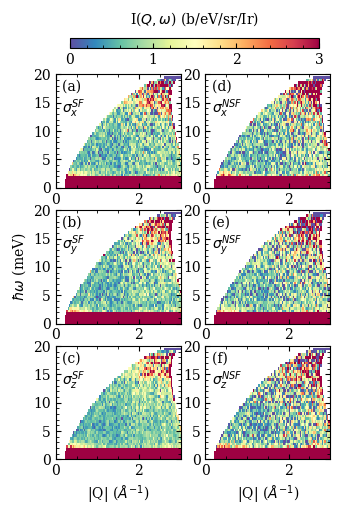

In [4]:
#Begin the figure here. 
fig,ax = plt.subplots(3,2,figsize=(3.54,5),subplot_kw={'projection':'mantid'})

keys=['pxsf','pysf','pzsf','pxnsf','pynsf','pznsf']

axi_dict = {keys[0]:[0,0],keys[1]:[1,0],keys[2]:[2,0],keys[3]:[0,1],keys[4]:[1,1],keys[5]:[2,1]}
label_dict = {keys[0]:'(a) \n$\sigma_x^{SF}$',keys[1]:'(b) \n$\sigma_y^{SF}$',keys[2]:'(c) \n$\sigma_z^{SF}$',\
              keys[3]:'(d) \n$\sigma_x^{NSF}$',\
              keys[4]:'(e)\n$\sigma_y^{NSF}$',keys[5]:'(f) \n$\sigma_z^{NSF}$'}

f_dict={keys[0]:'slice_data/HLIO_Px_SF.nxspe',\
      keys[1]:'slice_data/HLIO_Py_SF.nxspe',\
      keys[2]:'slice_data/HLIO_Pz_SF.nxspe',\
      keys[3]:'slice_data/HLIO_Px_NSF.nxspe',\
      keys[4]:'slice_data/HLIO_Py_NSF.nxspe',\
      keys[5]:'slice_data/HLIO_Pz_NSF.nxspe'}

for key in keys:
    Q20 = GenQslice(0,4,120)
    E20= GenEslice(-20,20,80)    
    ws = NxspeToMDHisto(f_dict[key],Q20,E20)
    ws_out=CloneWorkspace(ws,OutputWorkspace=key+'_MD')

vmax=3
vmin=0
for key in keys:
    ws = mtd[key+'_MD']
    ws*=norm
    ax_plot = ax[axi_dict[key][0],axi_dict[key][1]]
    mesh = ax_plot.pcolormesh(ws,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
    ax_plot.set_ylim(0,20)
    ax_plot.set_xlim(0,3)
    ax_plot.set_ylabel('')
    if key=='pxsf':
        l,b,w,h=ax_plot.get_position().bounds
        cax = fig.add_axes([l+0.04,b+0.28,w*2.0,0.02])
        labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
        cax.text(0.5,2.0,labelstr,transform=cax.transAxes,horizontalalignment='center',\
                verticalalignment='bottom',rotation=0)
        cbar = plt.colorbar(mesh,orientation='horizontal',cax=cax)
        cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))

    ax_plot.text(0.05,0.95,label_dict[key],transform=ax_plot.transAxes,verticalalignment='top',horizontalalignment='left')
ax[1,0].set_ylabel('$\hbar\omega$ (meV)')

fig.savefig('dlio_hys_xcs.png',dpi=300,bbox_inches='tight')
fig.savefig('dlio_hys_xcs.pdf',dpi=300,bbox_inches='tight')

LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, will use default of 0.0 instead.
LoadNXSPE-[Notice] LoadNXSPE successful, Duration 0.07 seconds
ConvertToMD-[Notice] ConvertToMD started
ConvertToMD-[Notice] ConvertToMD successful, Duration 0.07 seconds
BinMD-[Notice] BinMD started
BinMD-[Notice] BinMD successful, Duration 0.01 seconds
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace started
CreateMDHistoWorkspace-[Notice] CreateMDHistoWorkspace successful, Duration 0.01 seconds
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace started
CreateSingleValuedWorkspace-[Notice] CreateSingleValuedWorkspace successful, Duration 0.00 seconds
MultiplyMD-[Notice] MultiplyMD started
MultiplyMD-[Notice] MultiplyMD successful, Duration 0.00 seconds
CloneWorkspace-[Notice] CloneWorkspace started
CloneWorkspace-[Notice] CloneWorkspace successful, Duration 0.00 seconds
LoadNXSPE-[Notice] LoadNXSPE started
LoadNXSPE-[Warning] Entry for PSI is empty, wi

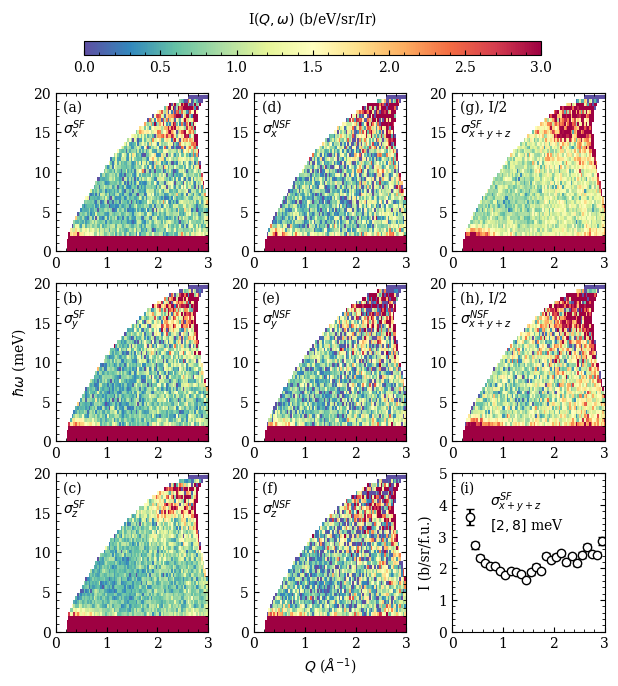

In [5]:
#Begin the figure here (alternate for dissertation). 
fig,ax = plt.subplots(3,3,figsize=(3.54*2,7),subplot_kw={'projection':'mantid'})
fig.subplots_adjust(hspace=0.2,wspace=0.3)
keys=['pxsf','pysf','pzsf','pxnsf','pynsf','pznsf']

axi_dict = {keys[0]:[0,0],keys[1]:[1,0],keys[2]:[2,0],keys[3]:[0,1],keys[4]:[1,1],keys[5]:[2,1]}
label_dict = {keys[0]:'(a) \n$\sigma_x^{SF}$',keys[1]:'(b) \n$\sigma_y^{SF}$',keys[2]:'(c) \n$\sigma_z^{SF}$',\
              keys[3]:'(d) \n$\sigma_x^{NSF}$',\
              keys[4]:'(e)\n$\sigma_y^{NSF}$',keys[5]:'(f) \n$\sigma_z^{NSF}$'}

f_dict={keys[0]:'slice_data/HLIO_Px_SF.nxspe',\
      keys[1]:'slice_data/HLIO_Py_SF.nxspe',\
      keys[2]:'slice_data/HLIO_Pz_SF.nxspe',\
      keys[3]:'slice_data/HLIO_Px_NSF.nxspe',\
      keys[4]:'slice_data/HLIO_Py_NSF.nxspe',\
      keys[5]:'slice_data/HLIO_Pz_NSF.nxspe'}

for key in keys:
    Q20 = GenQslice(0,4,120)
    E20= GenEslice(-20,20,80)    
    ws = NxspeToMDHisto(f_dict[key],Q20,E20)
    ws_out=CloneWorkspace(ws,OutputWorkspace=key+'_MD')

vmax=3
vmin=0
for key in keys:
    ws = mtd[key+'_MD']
    ws*=norm
    ax_plot = ax[axi_dict[key][0],axi_dict[key][1]]
    mesh = ax_plot.pcolormesh(ws,vmin=0,vmax=vmax,cmap='Spectral_r',rasterized=True)
    ax_plot.set_ylim(0,20)
    ax_plot.set_xlim(0,3)
    ax_plot.set_ylabel('')
    if key=='pxsf':
        l,b,w,h=ax_plot.get_position().bounds
        cax = fig.add_axes([l+0.04,b+0.28,w*3.0,0.02])
        labelstr='I($Q,\omega$) (b/eV/sr/Ir)'
        cax.text(0.5,2.0,labelstr,transform=cax.transAxes,horizontalalignment='center',\
                verticalalignment='bottom',rotation=0)
        cbar = plt.colorbar(mesh,orientation='horizontal',cax=cax)
        cax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter("%.2f"))
    if axi_dict[key][1]>0:
        ax_plot.set_ylabel('')
    ax_plot.set_xlabel('')
    ax_plot.text(0.05,0.95,label_dict[key],transform=ax_plot.transAxes,verticalalignment='top',horizontalalignment='left')
ax[1,0].set_ylabel('$\hbar\omega$ (meV)')

#Some additional plots for the dissertation
  
wstotsf = NxspeToMDHisto('slice_data/HLIO_tot_SF.nxspe',Q20,E20)
md_totsf=CloneWorkspace(wstotsf,OutputWorkspace='totSF_MD')
md_totsf*=norm
wstotnsf = NxspeToMDHisto('slice_data/HLIO_tot_NSF.nxspe',Q20,E20)
md_totnsf=CloneWorkspace(wstotsf,OutputWorkspace='totNSF_MD')
md_totnsf*=norm
ax[0,2].pcolormesh(md_totsf,vmin=0,vmax=vmax*2,cmap='Spectral_r',rasterized=True)
ax[1,2].pcolormesh(md_totnsf,vmin=0,vmax=vmax*2,cmap='Spectral_r',rasterized=True)
ax[0,2].set_ylim(0,20)
ax[1,2].set_ylim(0,20)
ax[0,2].set_xlim(0,3)
ax[1,2].set_xlim(0,3)
ax[0,2].text(0.05,0.95,'(g), I/2\n$\sigma_{x+y+z}^{SF}$',transform=ax[0,2].transAxes,verticalalignment='top',horizontalalignment='left')
ax[1,2].text(0.05,0.95,'(h), I/2\n$\sigma_{x+y+z}^{NSF}$',transform=ax[1,2].transAxes,verticalalignment='top',horizontalalignment='left')

#Cuts comparing the totSF to totNSF data
#esf,isf,errsf = cut_MDHisto_powder(md_totsf,'DeltaE',[1.8,10,0.2],[0.3,0.8])
#ensf,insf,errnsf = cut_MDHisto_powder(md_totnsf,'DeltaE',[1.8,10,0.2],[0.3,0.8])
esf,isf,errsf = cut_MDHisto_powder(md_totsf,'|Q|',[0,3,0.1],[2,8])
#ensf,insf,errnsf = cut_MDHisto_powder(md_totnsf,'|Q|',[0,1.8,0.2],[2,3])
ax[2,2].errorbar(esf,isf,errsf,color='k',marker='o',ls=' ',capsize=3,mfc='w',mec='k')
ax[2,2].set_xlim(0,3)
ax[2,2].text(0.05,0.95,'(i)',transform=ax[2,2].transAxes,verticalalignment='top',horizontalalignment='left')

ax[2,2].text(0.25,1.0,' \n$\sigma_{x+y+z}^{SF}$\n$[2,8]$ meV',transform=ax[2,2].transAxes,verticalalignment='top',horizontalalignment='left')
ax[2,2].set_ylim(0,5)
ax[2,1].set_xlabel('$Q$ ($\AA^{-1}$)')
ax[2,0].set_xlabel('')
ax[2,2].set_xlabel('')
ax[0,2].set_xlabel('')
ax[1,2].set_xlabel('')
ax[0,2].set_ylabel('')
ax[1,2].set_ylabel('')
#ax[2,2].yaxis.set_label_position('right')
ax[2,2].set_ylabel('I (b/sr/f.u.)')
#ax[2,2].errorbar(ensf,insf,errnsf,color='r',marker='o',ls=' ',capsize=3)

fig.savefig('dlio_hys_xcs_dissertation.png',dpi=300,bbox_inches='tight')
fig.savefig('dlio_hys_xcs_dissertation.pdf',dpi=300,bbox_inches='tight')